/usr/local/lib/python3.7/dist-packages/gym/core.py:318: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."
/usr/local/lib/python3.7/dist-packages/gym/wrappers/step_api_compatibility.py:40: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."


[1.]
Total steps: 999 	 Episode: 0/998 	 Total reward: -32.57129825315092 	 Success 0
Total steps: 1998 	 Episode: 1/998 	 Total reward: -32.93867376271293 	 Success 0
Total steps: 2997 	 Episode: 2/998 	 Total reward: -33.703399387490194 	 Success 0
Total steps: 3996 	 Episode: 3/998 	 Total reward: -33.689136744464946 	 Success 0
Total steps: 4995 	 Episode: 4/998 	 Total reward: -32.82380534087694 	 Success 0
Total steps: 5994 	 Episode: 5/998 	 Total reward: -33.550175083198006 	 Success 0
Total steps: 6993 	 Episode: 6/998 	 Total reward: -32.043887075989026 	 Success 0
Total steps: 7992 	 Episode: 7/998 	 Total reward: -32.19717237488992 	 Success 0
Total steps: 8991 	 Episode: 8/998 	 Total reward: -33.70885866450075 	 Success 0
Total steps: 9990 	 Episode: 9/998 	 Total reward: -32.53325100105498 	 Success 0
Total steps: 10989 	 Episode: 10/998 	 Total reward: -33.996794131867006 	 Success 0
Total steps: 11988 	 Episode: 11/998 	 Total reward: -34.9266564397368 	 Success 0
Tota

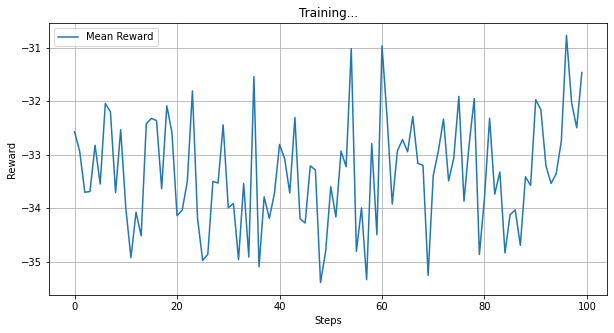

In [1]:
import copy
from collections import namedtuple
from itertools import count
import math
import random
import numpy as np 
import time

import gym

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as T

from collections import namedtuple
import random
from PIL import Image
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap

def plot(rewards):
    fig = plt.figure(figsize=(10,5)) 

    plt.plot(rewards,label='Mean Reward')
    plt.title('Training...')
    plt.xlabel('Steps')
    plt.ylabel('Reward')
    plt.grid()
    plt.legend()

    plt.savefig('rand.png')


def select_action(state):
    global steps_done
    steps_done += 1
    return np.random.uniform(env.action_space.low[0],env.action_space.high[0])

def get_state(obs, prev_state=None):
    state = np.array(obs)
    state = torch.from_numpy(state).type(torch.FloatTensor)
    return state.unsqueeze(0)

def train(env, n_episodes):
    rewards = []

    successes = 0
    for episode in range(n_episodes):
        obs = env.reset()
        state = get_state(obs)
        total_reward = 0.0
        for t in count():
            action = select_action(state)
            obs, reward, done, info = env.step([action])
            next_state =  get_state(obs)
            total_reward += reward

            state = next_state

            if done:
                if obs[0] >= 0.5:
                    successes +=1
                break
        rewards.append(total_reward)
        print('Total steps: {} \t Episode: {}/{} \t Total reward: {} \t Success {}'.format(steps_done, episode, t, total_reward, successes))
    env.close()
    plot(rewards)
    return


if __name__ == '__main__':
    # set device
    device = torch.device("cpu")
    NUM_EPISODES = 100

    steps_done = 0

    # create environment
    env = gym.make('MountainCarContinuous-v0')
    print(env.action_space.high)
    
    # train model
    train(env, NUM_EPISODES)

In [3]:
pip install gym[box2d]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.1 MB 7.5 MB/s 
     |████████████████████████████████| 18.3 MB 94 kB/s 
     |████████████████████████████████| 1.8 MB 35.4 MB/s 


Episode: 0, Reward: -642.561926
Episode: 1, Reward: -267.066404
Episode: 2, Reward: -79.450108
Episode: 3, Reward: -418.722625
Episode: 4, Reward: -388.084682
Episode: 5, Reward: -537.159464
Episode: 6, Reward: -147.773305
Episode: 7, Reward: -347.070716
Episode: 8, Reward: -420.390949
Episode: 9, Reward: -236.695089
Episode: 10, Reward: -406.948976
Episode: 11, Reward: -569.268649
Episode: 12, Reward: -293.622498
Episode: 13, Reward: -634.638720
Episode: 14, Reward: -612.915521
Episode: 15, Reward: -239.502064
Episode: 16, Reward: -536.164485
Episode: 17, Reward: -279.353231
Episode: 18, Reward: -540.184012
Episode: 19, Reward: -381.231600
Episode: 20, Reward: -389.101443
Episode: 21, Reward: -402.697998
Episode: 22, Reward: -447.397559
Episode: 23, Reward: -577.075949
Episode: 24, Reward: -405.892180
Episode: 25, Reward: -448.362327
Episode: 26, Reward: -557.231580
Episode: 27, Reward: -345.291761
Episode: 28, Reward: -312.406482
Episode: 29, Reward: -479.730625
Episode: 30, Reward: 

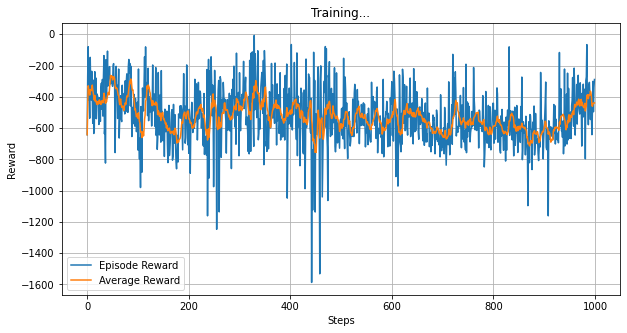

In [7]:
import copy
from collections import namedtuple
from itertools import count
import math
import random
import numpy as np 
import time
from collections import deque
import gym

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as T

from collections import namedtuple
import random
from PIL import Image
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap

def plot(rewards,avg_rewards):
    fig = plt.figure(figsize=(10,5)) 

    plt.plot(rewards,label='Episode Reward')
    plt.plot(avg_rewards,label='Average Reward')
    plt.title('Training...')
    plt.xlabel('Steps')
    plt.ylabel('Reward')
    plt.grid()
    plt.legend()

    plt.savefig('ddpg.png')

class Critic(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(Critic, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.linear2 = nn.Linear(hidden_size, hidden_size)
        self.linear3 = nn.Linear(hidden_size, 1)

    def forward(self, state, action):
        """
        Params state and actions are torch tensors
        """
        x = torch.cat([state, action], 1)
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = self.linear3(x)

        return x

class Actor(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, learning_rate = 3e-4):
        super(Actor, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.linear2 = nn.Linear(hidden_size, hidden_size)
        self.linear3 = nn.Linear(hidden_size, output_size)
        
    def forward(self, state):
        """
        Param state is a torch tensor
        """
        x = F.relu(self.linear1(state))
        x = F.relu(self.linear2(x))
        x = torch.tanh(self.linear3(x))

        return x

class ReplayMemory:
    def __init__(self, max_size):
        self.buffer = deque(maxlen=max_size)
    
    def push(self, state, action, reward, next_state, done):
        experience = (state, action, np.array([reward]), next_state, done)
        self.buffer.append(experience)

    def sample(self, batch_size):
        state_batch = []
        action_batch = []
        reward_batch = []
        next_state_batch = []
        done_batch = []

        batch = random.sample(self.buffer, batch_size)

        for experience in batch:
            state, action, reward, next_state, done = experience
            state_batch.append(state)
            action_batch.append(action)
            reward_batch.append(reward)
            next_state_batch.append(next_state)
            done_batch.append(done)
        
        return state_batch, action_batch, reward_batch, next_state_batch, done_batch

    def __len__(self):
        return len(self.buffer)


class OUNoise(object):
    def __init__(self, action_space, mu=0.0, theta=0.15, max_sigma=0.3, min_sigma=0.3, decay_period=100000):
        self.mu           = mu
        self.theta        = theta
        self.sigma        = max_sigma
        self.max_sigma    = max_sigma
        self.min_sigma    = min_sigma
        self.decay_period = decay_period
        self.action_dim   = action_space.shape[0]
        self.low          = action_space.low
        self.high         = action_space.high
        self.reset()
        
    def reset(self):
        self.state = np.ones(self.action_dim) * self.mu
        
    def evolve_state(self):
        x  = self.state
        dx = self.theta * (self.mu - x) + self.sigma * np.random.randn(self.action_dim)
        self.state = x + dx
        return self.state
    
    def get_action(self, action, t=0): 
        ou_state = self.evolve_state()
        self.sigma = self.max_sigma - (self.max_sigma - self.min_sigma) * min(1.0, t / self.decay_period)
        return np.clip(action + ou_state, self.low, self.high)

class GaussNoise(object):
    def __init__(self, action_space, mu=0.0, sigma=0.3, decay_period=10000):
        self.mu           = mu
        self.sigma        = sigma
        self.decay_period = decay_period
        self.action_dim   = action_space.shape[0]
        self.low          = action_space.low
        self.high         = action_space.high
        self.reset()
        
    def reset(self):
        pass
    
    def get_action(self, action, t=0): 
        noise = int(np.exp(-t/self.decay_period)*np.random.randn(self.mu,self.sigma,self.action_dim))
        return np.clip(action + noise, self.low, self.high)



def select_action(state):
    state = torch.from_numpy(state).float().unsqueeze(0)
    action = actor(state)
    action = action.detach().numpy()[0,0]
    return action
    
def optimize_model():
    states, actions, rewards, next_states, _ = memory.sample(BATCH_SIZE)
    states = torch.FloatTensor(states)
    actions = torch.FloatTensor(actions)
    rewards = torch.FloatTensor(rewards)
    next_states = torch.FloatTensor(next_states)
    
    # Critic loss        
    Qvals = critic(states, actions)
    next_actions = target_actor(next_states)
    next_Q = target_critic(next_states, next_actions.detach())
    Qprime = rewards + GAMMA* next_Q
    critic_loss = F.mse_loss(Qvals, Qprime)

    # Actor loss
    policy_loss = -critic(states, actor(states)).mean()
        
    # update networks
    actor_optimizer.zero_grad()
    policy_loss.backward()
    actor_optimizer.step()

    critic_optimizer.zero_grad()
    critic_loss.backward() 
    critic_optimizer.step()

    # update target networks 
    for target_param, param in zip(target_actor.parameters(), actor.parameters()):
        target_param.data.copy_(param.data *TAU + target_param.data * (1.0 - TAU))
       
    for target_param, param in zip(target_critic.parameters(), critic.parameters()):
        target_param.data.copy_(param.data *TAU + target_param.data * (1.0 - TAU))

# transform  =  T.Compose([T.ToPILImage(), T.Grayscale(),T.Resize((64,64)), T.ToTensor()])
def get_state(obs, prev_state=None):
    state = np.array(obs)
    state = torch.from_numpy(state).type(torch.FloatTensor)
    return state.unsqueeze(0)

def train(env, n_episodes):
    rewards = []
    avg_rewards = []

    for episode in range(n_episodes):
        state = env.reset()
        noise.reset()
        episode_reward = 0
    
        for step in count():
            action = select_action(state)
            action = noise.get_action(action, step)
            new_state, reward, done, _ = env.step(action) 
            memory.push(state, action, reward, new_state, done)
        
            if len(memory) > BATCH_SIZE:
                optimize_model()        
        
            state = new_state
            episode_reward += reward

            if done:
                break
        print("Episode: {}, Reward: {:3f}".format(episode, episode_reward))
        rewards.append(episode_reward)
        avg_rewards.append(np.mean(rewards[-10:]))
    plot(rewards,avg_rewards)
    return


if __name__ == '__main__':

    # hyperparameters
    BATCH_SIZE = 512
    GAMMA = 0.9
    MEMORY_SIZE = 50000
    NUM_EPISODES = 1000
    TAU = 0.01
    env = gym.make('LunarLanderContinuous-v2')
    noise = OUNoise(env.action_space)
    #noise = GaussNoise(env.action_space)

    # create networks
    actor = Actor(env.observation_space.shape[0], 512, env.action_space.shape[0])
    target_actor = Actor(env.observation_space.shape[0], 512, env.action_space.shape[0])
    target_actor.load_state_dict(actor.state_dict())

    critic = Critic(env.observation_space.shape[0] + env.action_space.shape[0], 256 )
    target_critic = Critic(env.observation_space.shape[0] + env.action_space.shape[0], 256 )
    target_critic.load_state_dict(critic.state_dict())


    # setup optimizer
    actor_optimizer = optim.Adam(actor.parameters(), lr=1e-4)
    critic_optimizer = optim.Adam(critic.parameters(), lr=1e-3)

    # initialize replay memory
    memory = ReplayMemory(MEMORY_SIZE)
    
    # train model
    train(env, NUM_EPISODES)